In [1]:
from Qlearning import QAgent
from TestEnv import HydroElectric_Test
import matplotlib.pyplot as plt
import numpy as np 
import random

In [2]:
seed = 5
np.random.seed(seed)
random.seed(seed)
log = []

In [3]:
env = HydroElectric_Test("train.xlsx")
env.reset(seed=seed)
# env.discrete_action_space.seed(seed)
#env_wrapped = StepWrapper(env, step_hours=1)
agent = QAgent(env)


# step_hours = 3 
# agent = QAgent(env)


In [4]:
env.reset()

(array([5.000e+04, 2.431e+01, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.007e+03]),
 {})

In [6]:
agent.train(
    simulations=60,
    learning_rate=0.1,
    epsilon = 0.5,
    adaptive_epsilon=False,
    adaptive_learning_rate = True,
)


0 -834257.6357035249
20 -231663.39923432612
mean reward -8.81 min reward -3238.37 max reward 3210.88 max total reward -213595.71
40 -207650.83241870697
mean reward -7.89 min reward -1746.51 max reward 2336.02 max total reward -177534.62


In [ ]:
# agent.train(
#     simulations=20,
#     learning_rate=0.5,
#     epsilon=0.8,
#     adaptive_epsilon=False,
#     adaptive_learning_rate=False,
# )


In [ ]:
agent.env = HydroElectric_Test("validate.xlsx")
water_levels, rewards, action_history = agent.play()

Total reward in evaluation: 25559.96
avg reward 1.46
max 134.0110837087812 min -132.39831841857


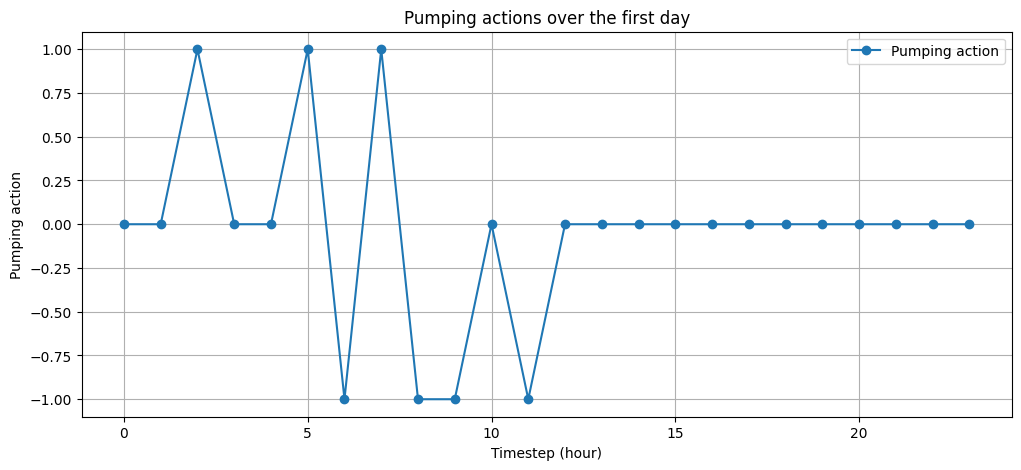

In [ ]:
%matplotlib inline

# Zorg dat je water_levels al hebt van agent.play()
actions = action_history[:24] # eerste 7 dagen, 24 uur per dag

plt.figure(figsize=(12,5))
plt.plot(actions, marker='o')
plt.title("Pumping actions over the first day")
plt.xlabel("Timestep (hour)")
plt.ylabel("Pumping action")
plt.legend(["Pumping action"])
plt.grid(True)
plt.show()

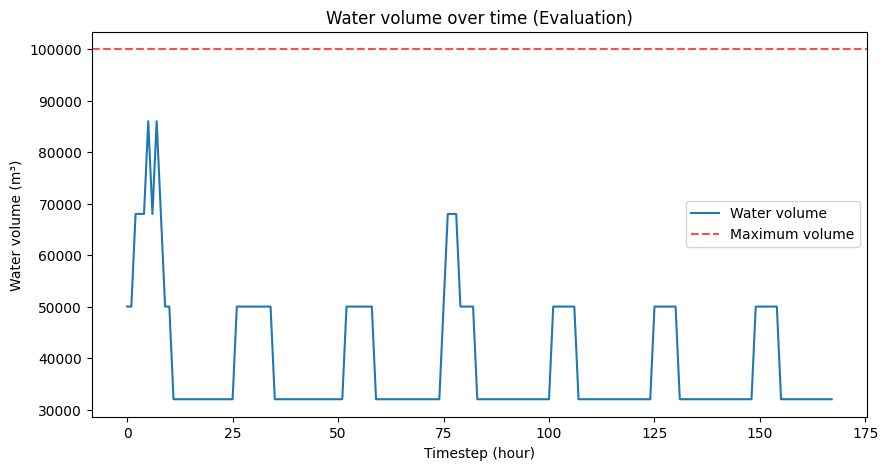

In [ ]:
# Plot waterniveau over tijd
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(water_levels[:24*7])  # eerste 7 dagen, 24 uur per dag
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
plt.title("Water volume over time (Evaluation)")
plt.xlabel("Timestep (hour)")
plt.ylabel("Water volume (m³)")
plt.legend(["Water volume", "Maximum volume"])
plt.show()


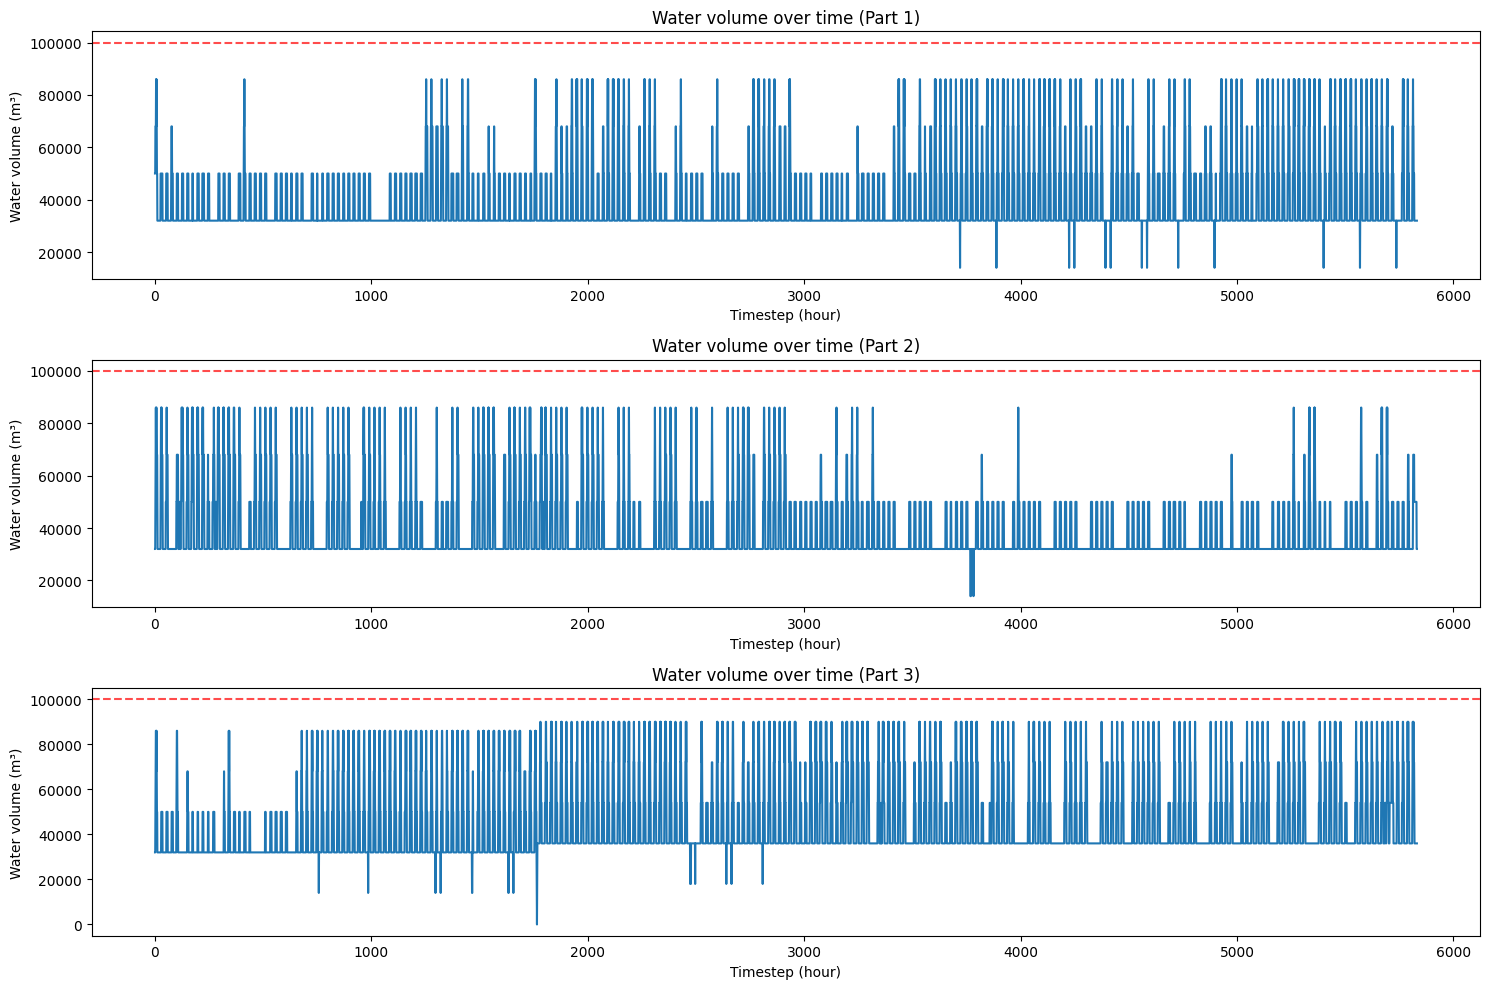

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Stel: water_levels bevat alle uren over 3 jaar
# en env.max_volume is de maximale waterhoeveelheid

# Aantal plots
n_plots = 3

# Verdeel de data in n_plots stukken
chunks = np.array_split(water_levels, n_plots)

plt.figure(figsize=(15,10))

for i, chunk in enumerate(chunks, 1):
    plt.subplot(n_plots, 1, i)
    plt.plot(chunk)
    plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
    plt.title(f"Water volume over time (Part {i})")
    plt.xlabel("Timestep (hour)")
    plt.ylabel("Water volume (m³)")

plt.tight_layout()
plt.show()


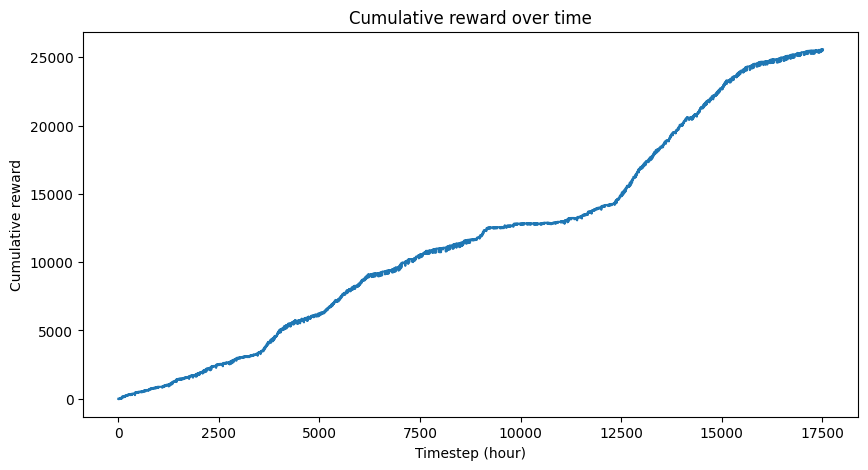

In [ ]:
# Plot cumulatieve reward
%matplotlib inline
cumulative_rewards = np.cumsum(rewards)
plt.figure(figsize=(10,5))
plt.plot(cumulative_rewards)
plt.title("Cumulative reward over time")
plt.xlabel("Timestep (hour)")
plt.ylabel("Cumulative reward")
plt.show()

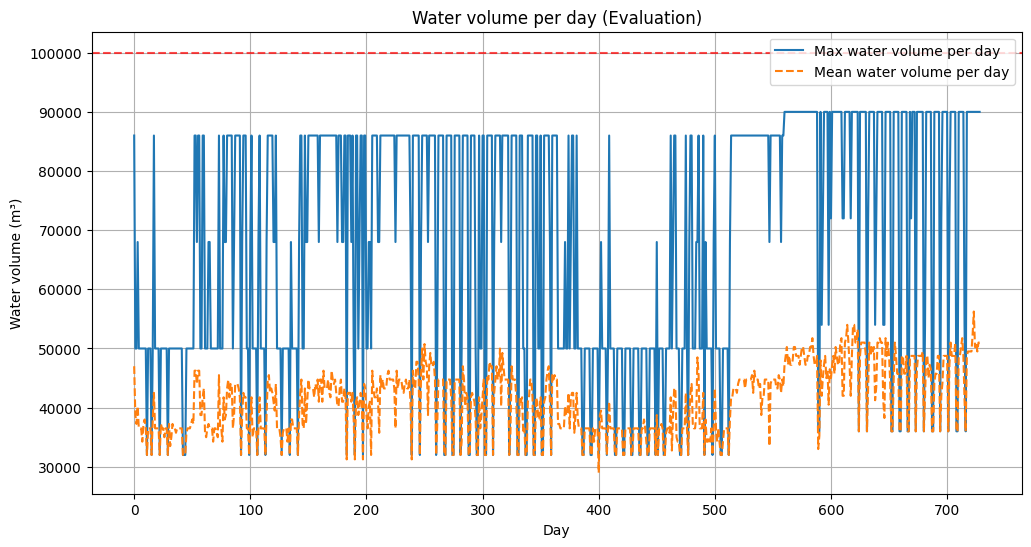

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Water levels per dag (max of gemiddeld)
hours_per_day = 24
num_days = len(water_levels) // hours_per_day

# Max waterniveau per dag
daily_max = [max(water_levels[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]
# Gemiddeld waterniveau per dag
daily_avg = [np.mean(water_levels[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]

plt.figure(figsize=(12,6))
plt.plot(daily_max, label='Max water volume per day')
plt.plot(daily_avg, label='Mean water volume per day', linestyle='--')
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
plt.title("Water volume per day (Evaluation)")
plt.xlabel("Day")
plt.ylabel("Water volume (m³)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# # Cumulatieve reward per dag
# daily_rewards = [sum(rewards[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]
# cumulative_daily_rewards = np.cumsum(daily_rewards)

# plt.figure(figsize=(12,6))
# plt.plot(cumulative_daily_rewards)
# plt.title("Cumulative reward per day")
# plt.xlabel("Day")
# plt.ylabel("Cumulative reward")
# plt.grid(True)
# plt.show()


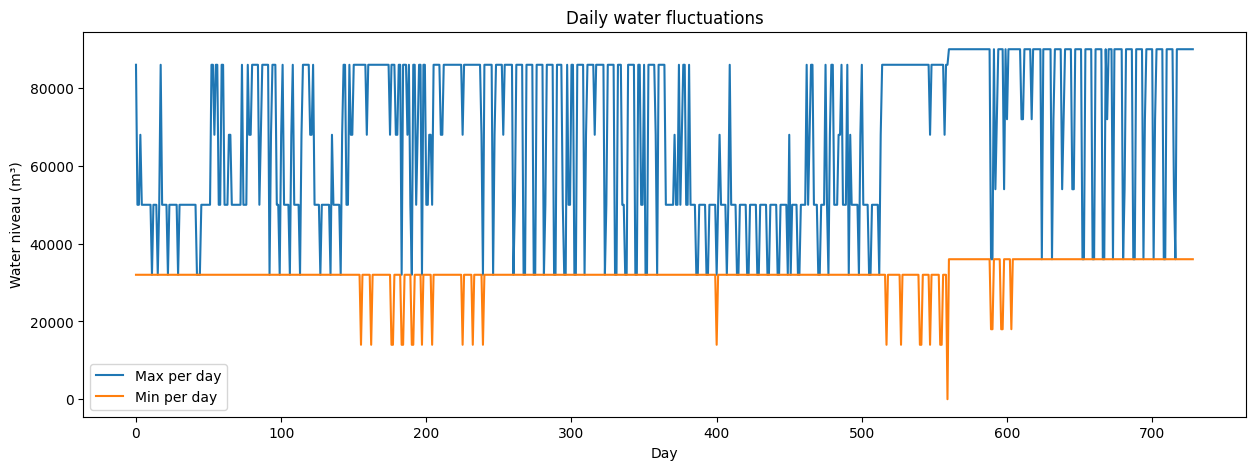

In [ ]:
water_levels = np.array(water_levels)  # zet om naar NumPy array

# Controleer of het aantal uren deelbaar is door 24
if len(water_levels) % 24 != 0:
    print("Waarschuwing: aantal uren niet deelbaar door 24, laatste incomplete dag wordt genegeerd")
    water_levels = water_levels[:-(len(water_levels) % 24)]

# Bereken max en min per dag
daily_max = water_levels.reshape(-1, 24).max(axis=1)
daily_min = water_levels.reshape(-1, 24).min(axis=1)

# Plotten
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(daily_max, label="Max per day")
plt.plot(daily_min, label="Min per day")
plt.legend()
plt.title("Daily water fluctuations")
plt.xlabel("Day")
plt.ylabel("Water niveau (m³)")
plt.show()


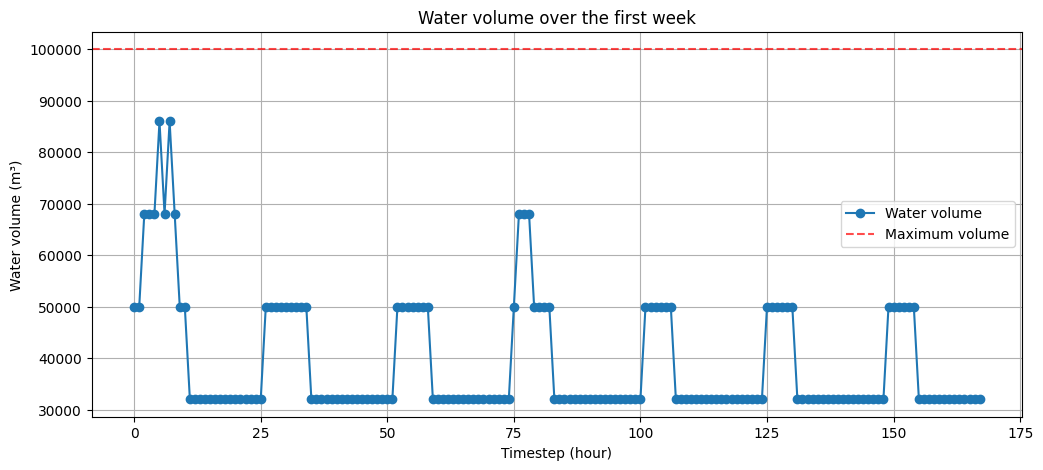

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Zorg dat je water_levels al hebt van agent.play()
first_week = water_levels[:24*7]  # eerste 7 dagen, 24 uur per dag

plt.figure(figsize=(12,5))
plt.plot(first_week, marker='o')
plt.title("Water volume over the first week")
plt.xlabel("Timestep (hour)")
plt.ylabel("Water volume (m³)")
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7, label="Max volume")
plt.legend(["Water volume", "Maximum volume"])
plt.grid(True)
plt.show()


In [ ]:
def plot_state_heatmap(agent, dim_x, dim_y):
    """
    dim_x, dim_y: strings, één van:
        "Volume", "Price", "Hour", "Week", "Month"
    """

    # 1. Mapping van naam → index in state_visits
    dim_map = {
        "Volume": 0,
        "Price": 1,
        "Hour": 2,
        "Week": 3,
        "Month": 4
    }

    # 2. Bins per dimensie
    bins_map = {
        "Volume": agent.volume_bins[:-1],
        "Price": agent.price_bins[:-1],
        "Hour": agent.hour_bins[:-1],
        "Week": agent.week_bins[:-1],
        "Month": agent.month_bins[:-1]
    }

    ix = dim_map[dim_x]
    iy = dim_map[dim_y]

    # 3. Alle dimensies behalve x en y weg-summen
    all_dims = {0, 1, 2, 3, 4}
    axes_to_sum = tuple(all_dims - {ix, iy})

    heatmap = agent.state_visits.sum(axis=axes_to_sum)

    # 4. Plotten
    plt.figure(figsize=(7,5))
    plt.imshow(heatmap, origin="lower", aspect="auto")
    plt.colorbar(label="Visits")
    plt.title(f"{dim_x} × {dim_y} visits")
    plt.xlabel(f"{dim_y} bin")
    plt.ylabel(f"{dim_x} bin")

    xbins = bins_map[dim_y]
    ybins = bins_map[dim_x]

    plt.xticks(ticks=np.arange(len(xbins)), labels=[str(b) for b in xbins])
    plt.yticks( ticks=np.arange(len(ybins)), labels=[str(b) for b in ybins])

    # 5. Getallen in de heatmap
    for i in range(heatmap.shape[0]):
        for j in range(heatmap.shape[1]):
            value = int(heatmap[i, j])
            plt.text(j, i, str(value),ha='center', va='center', fontsize=8, color="black")

    plt.tight_layout()
    plt.show()


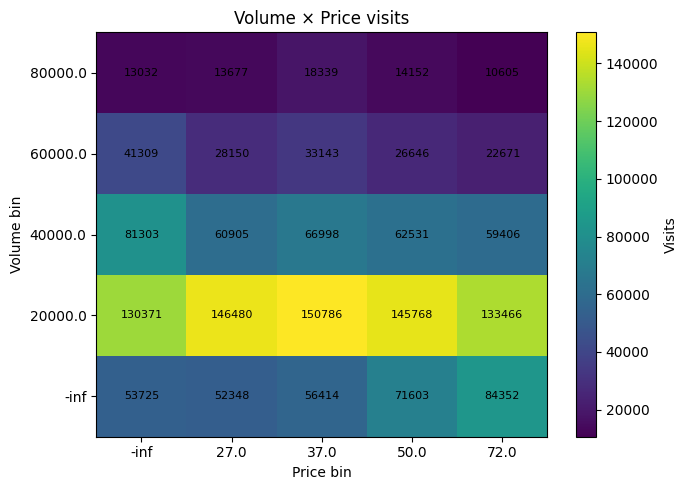

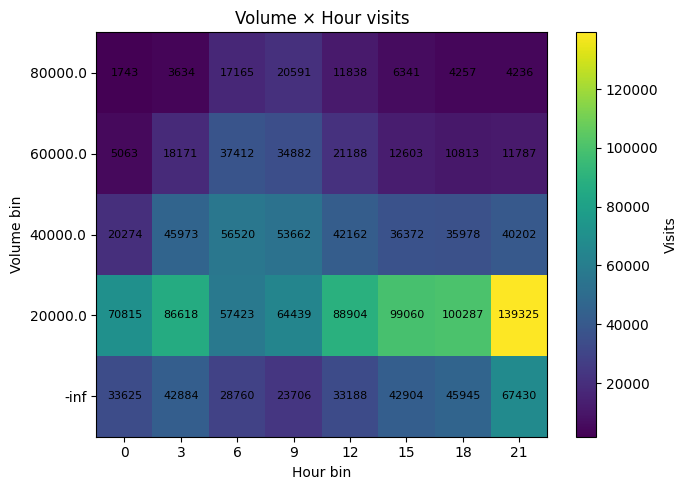

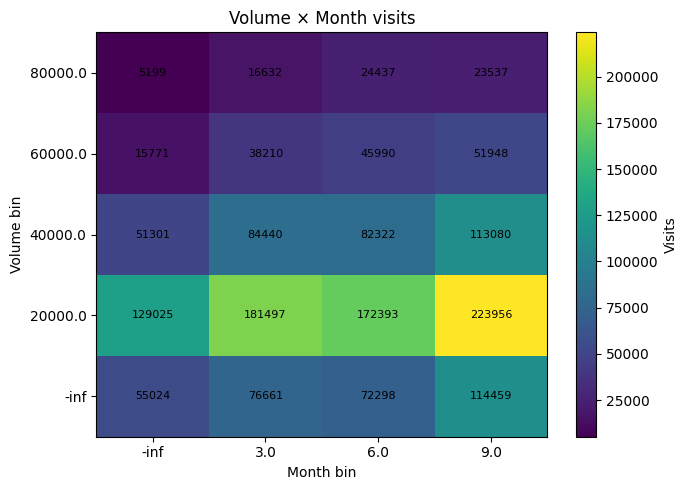

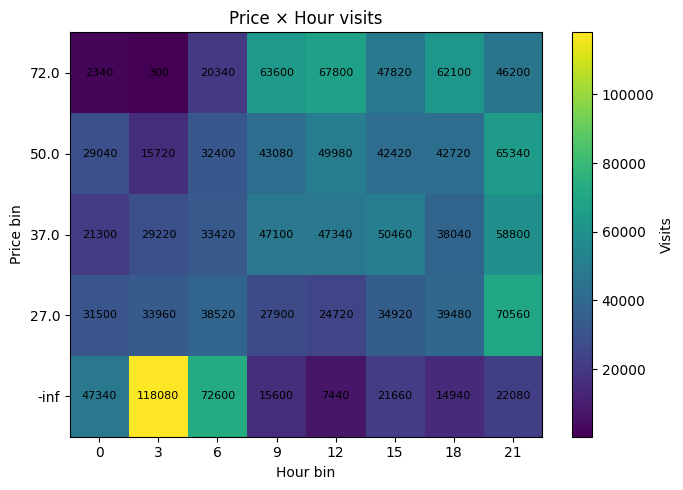

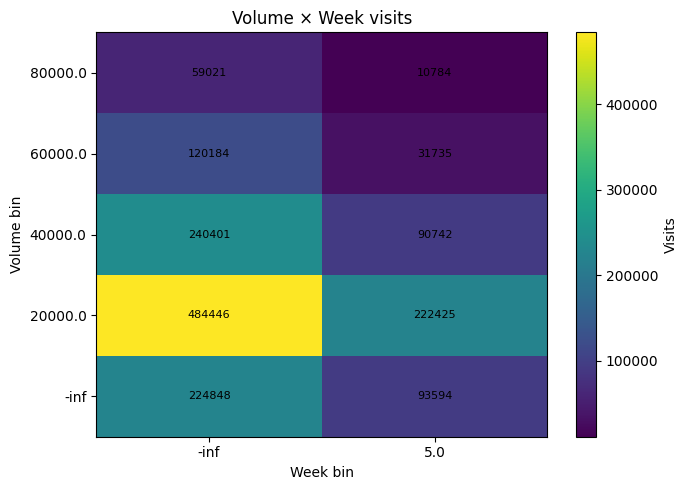

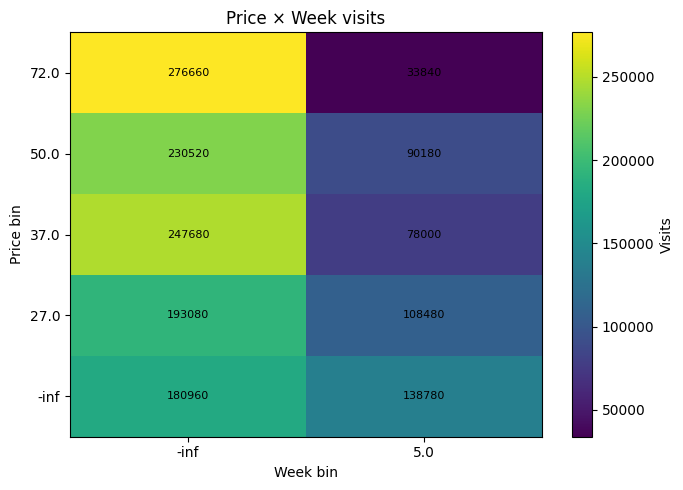

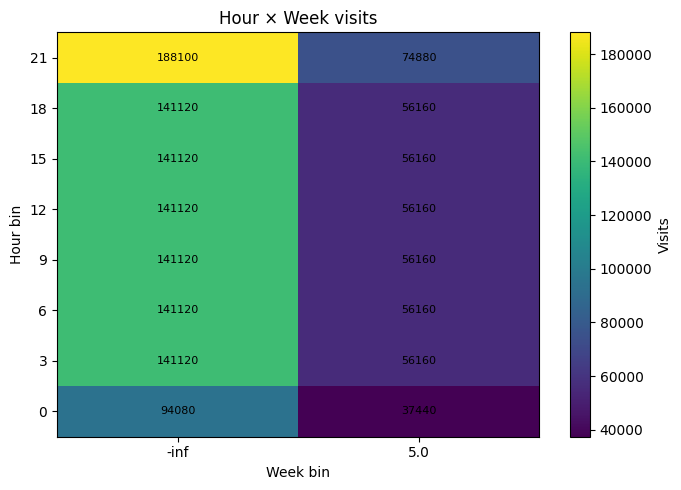

In [ ]:
logical_pairs = [ ("Volume", "Price"), ("Volume", "Hour"), ("Volume", "Month"), ("Price", "Hour"), ("Volume", "Week"), ("Price", "Week"), ("Hour", "Week") ]
for i,j in logical_pairs:
    plot_state_heatmap(agent, i, j)


In [ ]:
#old heatmap 
# visits_price_hour = agent.state_visits.sum(axis=0)  # sum over volume

# plt.figure(figsize=(10,4))
# plt.imshow(visits_price_hour.T, origin="lower", aspect="auto")
# plt.colorbar(label="Number of visits")

# for (y, x), value in np.ndenumerate(visits_price_hour.T):
#     plt.text(x, y, int(value), ha="center", va="center", color="white", fontsize=7)

# plt.xlabel("Price bin")
# plt.ylabel("Hour of day")
# plt.title("State visit heatmap (Price vs Hour)")

# plt.show()
